### Read all user data in my dataset


In [1]:
%run -i "scriptROC.py"

User 0 9OesCogfhLUKXkUQRhkLq8scAw02
User 1 XGHcBspXfRQj3jD91ty8u2UuT483
User 2 Z8RsBpxhnkebK5fvahVCmfV7icO2
User 3 fLqw0dU8z4brI2Jg74ps3pHqLak1


In [2]:
data = d[2]

### Split the timestamp

In [3]:
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day
data['hour'] = data['time'].dt.strftime("%H")

In [4]:
 data.head()

,time,sugarValue,year,month,day,hour
0,2020-01-09 12:05:00,90.71892,2020,1,9,12
1,2020-01-09 12:10:00,91.02510,2020,1,9,12
2,2020-01-09 12:15:00,90.82098,2020,1,9,12
3,2020-01-09 12:15:00,90.82098,2020,1,9,12
4,2020-01-09 12:20:00,90.61686,2020,1,9,12


In [5]:
data =data.groupby([data['year'],data['month'],data['day'] ,data['hour']]).mean()


In [6]:
data

sugarValue  year  month  day
year month day hour                              
2020 1     9   12     87.132240  2020      1    9
               13     79.841025  2020      1    9
               14     88.813516  2020      1    9
               15     86.630283  2020      1    9
               16     91.977660  2020      1    9
...                         ...   ...    ...  ...
           23  18    107.312175  2020      1   23
               19     99.168921  2020      1   23
               20    102.240643  2020      1   23
               21    104.284395  2020      1   23
               22    105.073659  2020      1   23

[347 rows x 4 columns]

In [7]:
del data['year']
del data['month']
del data['day']
#del data['hour']

In [8]:
data =data.reset_index()

In [9]:
data.head()

,year,month,day,hour,sugarValue
0,2020,1,9,12,87.132240
1,2020,1,9,13,79.841025
2,2020,1,9,14,88.813516
3,2020,1,9,15,86.630283
4,2020,1,9,16,91.977660


In [10]:
#import numpy as np

l= [([0])]


for y in range(0, len(data)-1):



    val1 = data['sugarValue'][y+1:y+2].values
    val2 = data['sugarValue'][y:y+1].values


    l.append( (((val1 / val2 )-1)*100) )


data['dataROC'] = np.array(l)



In [11]:
data

,year,month,day,hour,sugarValue,dataROC
0,2020,1,9,12,87.132240,0.000000
1,2020,1,9,13,79.841025,-8.367988
2,2020,1,9,14,88.813516,11.237946
3,2020,1,9,15,86.630283,-2.458222
4,2020,1,9,16,91.977660,6.172642
...,...,...,...,...,...,...
342,2020,1,23,18,107.312175,-2.046186
343,2020,1,23,19,99.168921,-7.588378
344,2020,1,23,20,102.240643,3.097465
345,2020,1,23,21,104.284395,1.998962


In [12]:
data['time'] = data[data.columns[0:3]].apply(
    lambda x: '-'.join(x.dropna().astype(str)),
    axis=1
)

In [13]:
data = data[["time","hour","sugarValue","dataROC"]]

In [14]:
data['timestamp'] = data[data.columns[0:2]].apply(
    lambda x: ' '.join(x.dropna().astype(str)),
    axis=1
)

In [15]:
data

,time,hour,sugarValue,dataROC,timestamp
0,2020-1-9,12,87.132240,0.000000,2020-1-9 12
1,2020-1-9,13,79.841025,-8.367988,2020-1-9 13
2,2020-1-9,14,88.813516,11.237946,2020-1-9 14
3,2020-1-9,15,86.630283,-2.458222,2020-1-9 15
4,2020-1-9,16,91.977660,6.172642,2020-1-9 16
...,...,...,...,...,...
342,2020-1-23,18,107.312175,-2.046186,2020-1-23 18
343,2020-1-23,19,99.168921,-7.588378,2020-1-23 19
344,2020-1-23,20,102.240643,3.097465,2020-1-23 20
345,2020-1-23,21,104.284395,1.998962,2020-1-23 21


In [16]:
del data['time']
del data['hour']

In [17]:
data.head()

,sugarValue,dataROC,timestamp
0,87.132240,0.000000,2020-1-9 12
1,79.841025,-8.367988,2020-1-9 13
2,88.813516,11.237946,2020-1-9 14
3,86.630283,-2.458222,2020-1-9 15
4,91.977660,6.172642,2020-1-9 16


In [18]:
data['timestamp']=pd.to_datetime(data['timestamp'], format='%Y-%m-%d %H')
data.set_index(['timestamp'], inplace=True)

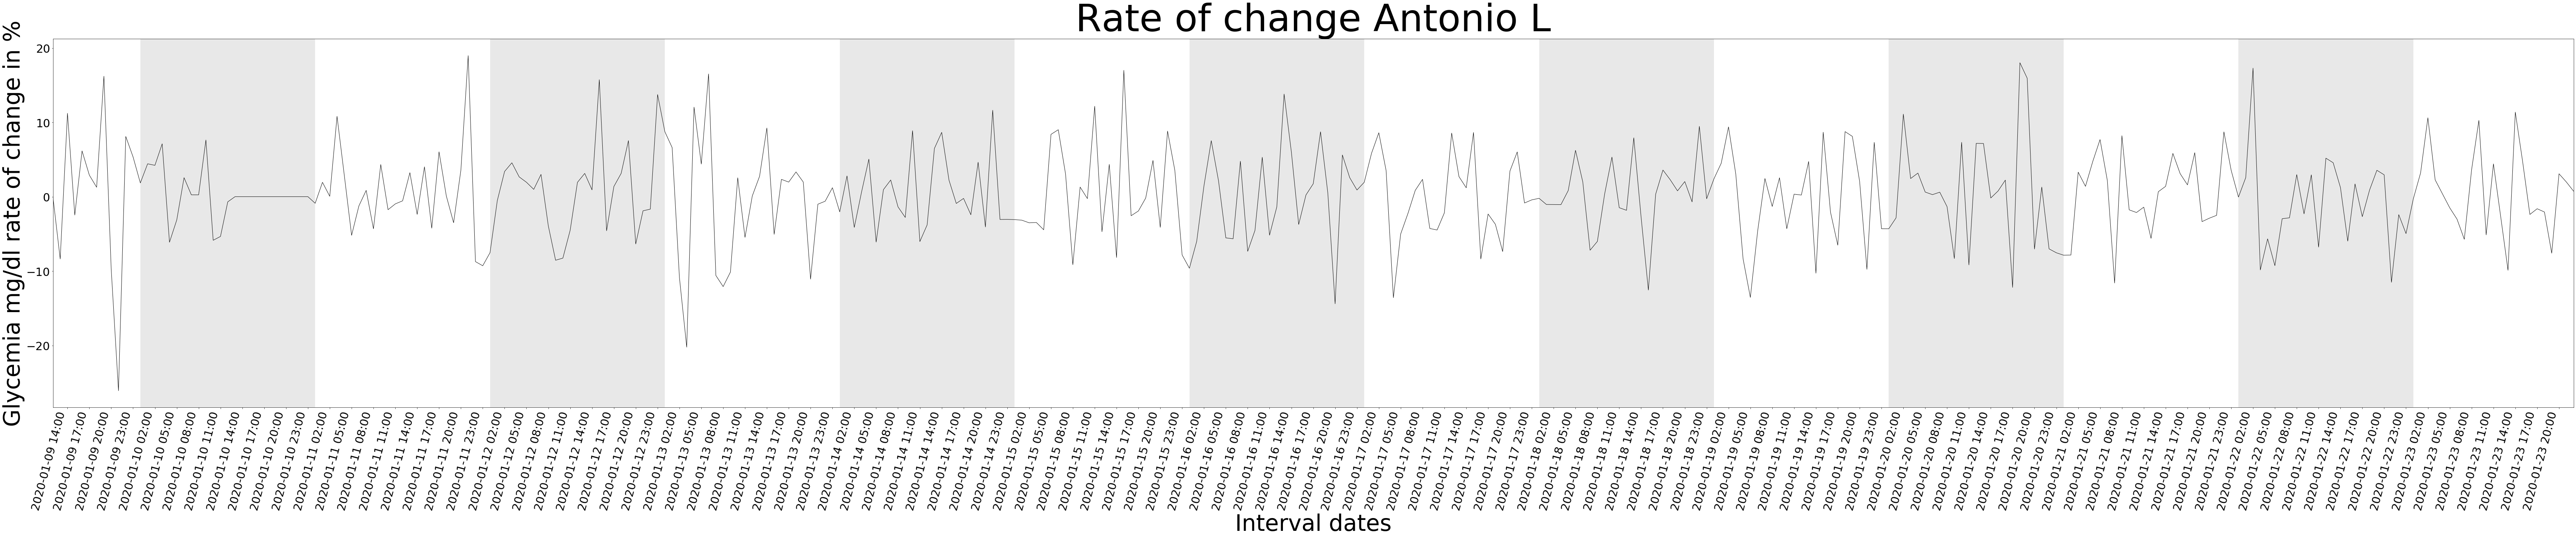

In [19]:
plotROC(data, "Antonio L")

In [20]:


aggr = pd.DataFrame(columns=['timestamp',  'dataROC'])

dataagg =data.reset_index()

for x in range(0, len(data)-3, 3):
   
    val = dataagg.iloc[x:x+3]


    #print(val["dataROC"])
    #print(val["dataROC"].mean())
    
    #print(val["timestamp"].iloc[2:3].values[0])
    time= pd.to_datetime(val["timestamp"].iloc[2:3].values[0], format='%Y-%m-%d %H:%M:%S') 
    
    
    
    aggr = aggr.append({'timestamp': time , 
                            'dataROC': val["dataROC"].mean()},ignore_index=True)

    
    

In [21]:
aggr

,timestamp,dataROC
0,2020-01-09 14:00:00,0.956653
1,2020-01-09 17:00:00,2.209495
2,2020-01-09 20:00:00,2.594256
3,2020-01-09 23:00:00,-4.202256
4,2020-01-10 02:00:00,3.510924
...,...,...
110,2020-01-23 08:00:00,-1.695963
111,2020-01-23 11:00:00,3.194293
112,2020-01-23 14:00:00,-0.400005
113,2020-01-23 17:00:00,0.265163


In [22]:
aggr= aggr.set_index(['timestamp'], inplace=False)

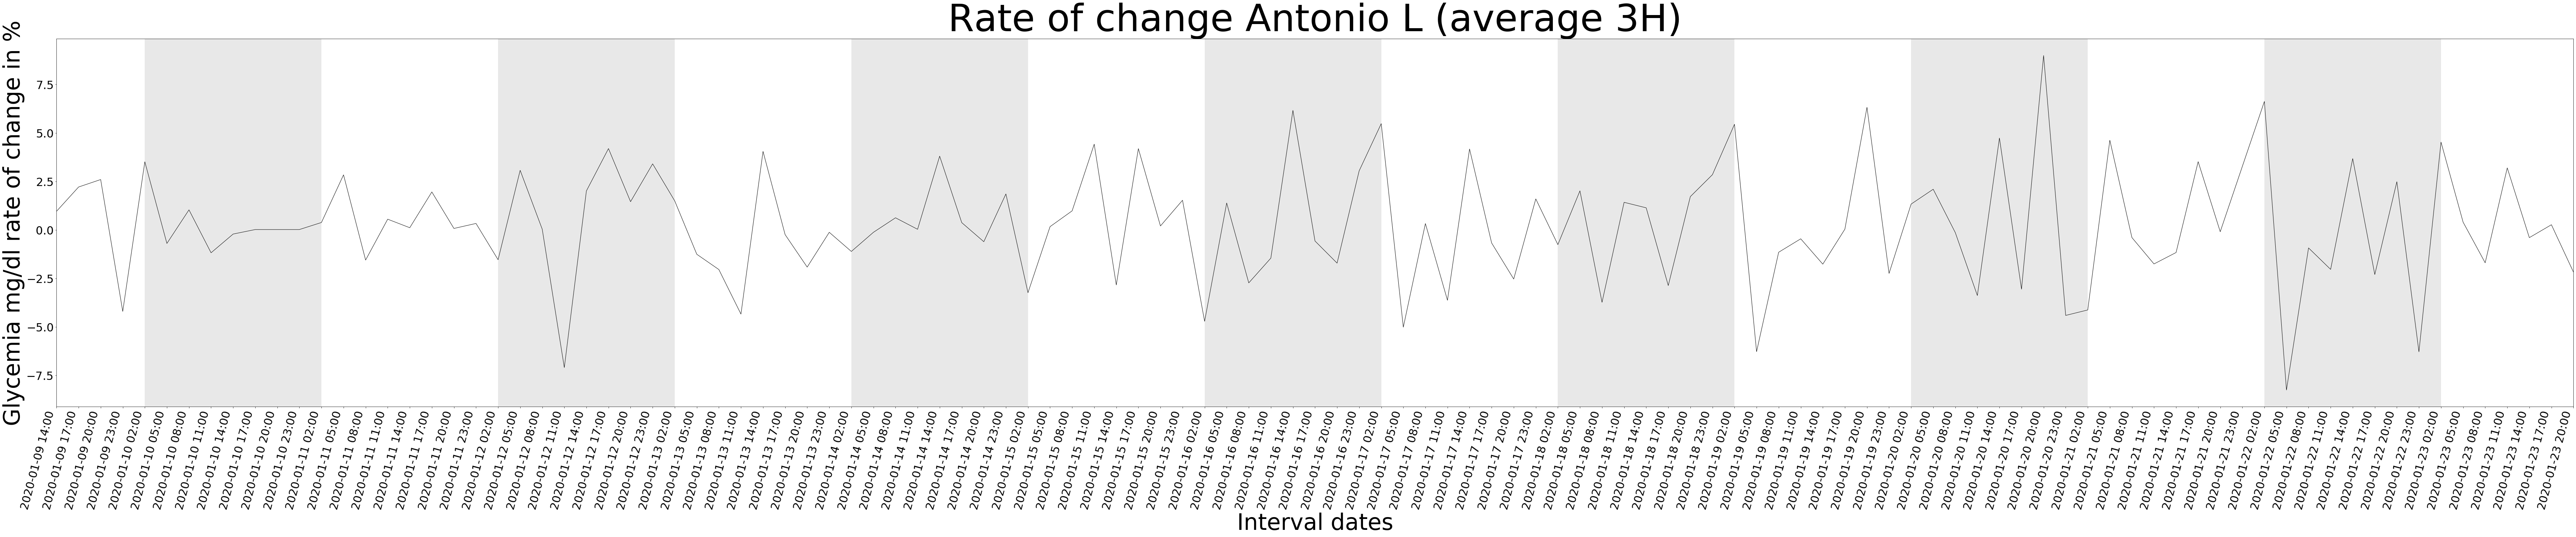

In [25]:

plotROC(aggr, "Antonio L (average 3H)")